Dataset shape: (3772, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3772 non-null   float64
 1   sex           3772 non-null   float64
 2   on thyroxine  3772 non-null   int64  
 3   TSH           3772 non-null   float64
 4   T3 measured   3772 non-null   int64  
 5   T3            3772 non-null   float64
 6   TT4           3772 non-null   float64
 7   binaryClass   3772 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 235.9 KB
               age          sex  on thyroxine          TSH  T3 measured  \
count  3772.000000  3772.000000   3772.000000  3772.000000  3772.000000   
mean     51.735879     0.684705      0.123012     5.086766     0.796129   
std      20.082295     0.455362      0.328494    23.290853     0.402927   
min       1.000000     0.000000      0.000000     0.005000     0.000000   
25%      36.

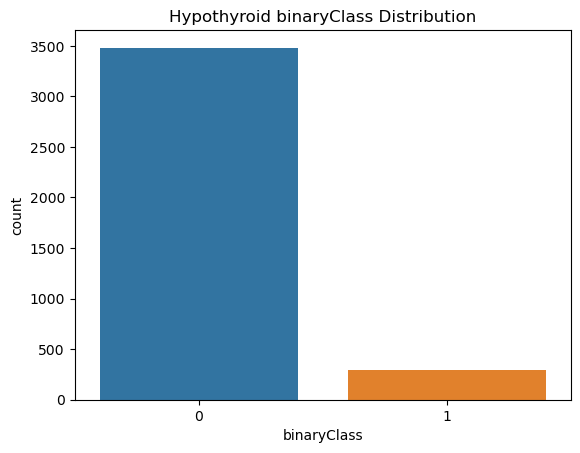

Train shape: (3017, 7) Test shape: (755, 7)
Best Random Forest Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       1.00      1.00      1.00        58

    accuracy                           1.00       755
   macro avg       1.00      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

Hypothyroid Random Forest model saved successfully!
Best Logistic Regression Params: {'C': 10, 'penalty': 'l1'}
Logistic Regression Accuracy: 0.9682119205298013
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       697
           1       0.97      0.60      0.74        58

    accuracy                           0.97       755
   macro avg       0.97      0.80      0.86       755
weighted avg       0.97      0.97      0.96       755


In [27]:
# %% [markdown]
# # Hypothyroid Model: Comparison of 3 Models
#
# This notebook loads the hypothyroid dataset, performs EDA and preprocessing, trains three models (Random Forest, Logistic Regression, and SVM) with hyperparameter tuning, evaluates them, and saves each model.

# %%
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

os.makedirs("Models", exist_ok=True)

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# %%
# Load the hypothyroid dataset (adjust the filename/path as needed)
df = pd.read_csv(r"C:\Users\pc\Desktop\med\Datasets\prepocessed_hypothyroid.csv")
print("Dataset shape:", df.shape)
df.head()

# %%
# Basic EDA
df.info()
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Assuming target column is 'Diagnosis'
sns.countplot(x='binaryClass', data=df)
plt.title("Hypothyroid binaryClass Distribution")
plt.show()

# %%
# Data Preprocessing
# Example: Encode a 'Sex' column if present
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df.fillna(df.mean(), inplace=True)

# %%
# Feature-target split
X = df.drop("binaryClass", axis=1)
y = df["binaryClass"]

# %%
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# %% [markdown]
# ### Model 1: Random Forest

# %%
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, param_dist_rf, n_iter=10, cv=5,
                               scoring='accuracy', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_
print("Best Random Forest Params:", rf_random.best_params_)

y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

joblib.dump(best_rf, "Models/hypothyroid_rf_model.pkl")
print("Hypothyroid Random Forest model saved successfully!")

# %% [markdown]
# ### Model 2: Logistic Regression

# %%
lr = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print(classification_report(y_test, y_pred_lr))

joblib.dump(best_lr, "Models/hypothyroid_lr_model.pkl")
print("Hypothyroid Logistic Regression model saved successfully!")

# %% [markdown]
# ### Model 3: Support Vector Machine

# %%
svc = SVC(probability=True)
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
best_svc = svc_grid.best_estimator_
print("Best SVM Params:", svc_grid.best_params_)

y_pred_svc = best_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVM Accuracy:", accuracy_svc)
print(classification_report(y_test, y_pred_svc))

joblib.dump(best_svc, "Models/hypothyroid_svc_model.pkl")
print("Hypothyroid SVM model saved successfully!")

# %%
print("Comparison of Models for Hypothyroid:")
print(f"Random Forest: {accuracy_rf:.4f}")
print(f"Logistic Regression: {accuracy_lr:.4f}")
print(f"SVM: {accuracy_svc:.4f}")
